In [1]:

# !pip install yfinance
import unicodedata
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime


In [2]:
sharekhan_portfolio_df = pd.read_csv("sharekhan.csv",skiprows=4)
sharekhan_stocks_list=sharekhan_portfolio_df['Stock Name'].to_list()
start_date ="2023-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')

In [3]:
for c in sharekhan_stocks_list :
    print(c) if isinstance(c,str)  else sharekhan_stocks_list.remove(c)
    

 ASIANPAINT
 BEL
 BHARTIARTL
 DABUR
 GODREJCP
 HCLTECH
 HDFCBANK
 HINDUNILVR
 INDUSINDBK
 ITC
 JUBLFOOD
 KOTAKBANK
 LT
 MARUTI
 PIDILITIND
 PIIND
 RELIANCE
 TCS
 TECHM
 TITAN
 WIPRO


In [4]:
stocks_isin=['INE585B01010',
'INE238A01034',
'INE918I01018',
'INE040A01034',
'INE001A01036',
'INE123W01016',
'INE062A01020',
'INE217B01036',
'INE176B01034',
'INE117A01022',
'INE154A01025',
'INE785M01013',
'INE053A01029',
'INF109K012R6',
'INE009A01021',
'INE075A01022',
'INE081A01012',
'INE376G01013',
'INE600L01024',
'INE002A01018',
'INE849A01020',
'INE111A01025',
'INE586V01016']

In [5]:
df = pd.read_csv('EQUITY_L.csv')
df=df[df[' ISIN NUMBER'].isin(stocks_isin)]
stocks_list = df['SYMBOL'].tolist()
stocks_list_NSE = list(map(lambda x: x+".NS",stocks_list))
stocks_list_Sharekhan = list(map(lambda x: x+".NS",sharekhan_stocks_list))
final_list = [ls.replace(u'\xa0', u'')  for ls in stocks_list_Sharekhan]
final_list = final_list + stocks_list_NSE
final_list = list(dict.fromkeys(final_list))
print(f" Final List = {final_list}")
data1 = yf.download(final_list,start=start_date,end=end_date)


 Final List = ['ASIANPAINT.NS', 'BEL.NS', 'BHARTIARTL.NS', 'DABUR.NS', 'GODREJCP.NS', 'HCLTECH.NS', 'HDFCBANK.NS', 'HINDUNILVR.NS', 'INDUSINDBK.NS', 'ITC.NS', 'JUBLFOOD.NS', 'KOTAKBANK.NS', 'LT.NS', 'MARUTI.NS', 'PIDILITIND.NS', 'PIIND.NS', 'RELIANCE.NS', 'TCS.NS', 'TECHM.NS', 'TITAN.NS', 'WIPRO.NS', 'ABB.NS', 'AXISBANK.NS', 'BAJAJFINSV.NS', 'BIOCON.NS', 'CONCOR.NS', 'HAVELLS.NS', 'HDFC.NS', 'INDHOTEL.NS', 'INFY.NS', 'KAJARIACER.NS', 'LALPATHLAB.NS', 'PCJEWELLER.NS', 'SBILIFE.NS', 'SBIN.NS', 'TATASTEEL.NS', 'TCIEXP.NS', 'TRENT.NS']
[*********************100%***********************]  38 of 38 completed

1 Failed download:
- HDFC.NS: No data found for this date range, symbol may be delisted


In [6]:
df_eq = pd.read_csv('EQUITY_L.csv')
df_eq.shape

(1669, 8)

In [7]:
data1.columns

MultiIndex([('Adj Close',        'ABB.NS'),
            ('Adj Close', 'ASIANPAINT.NS'),
            ('Adj Close',   'AXISBANK.NS'),
            ('Adj Close', 'BAJAJFINSV.NS'),
            ('Adj Close',        'BEL.NS'),
            ('Adj Close', 'BHARTIARTL.NS'),
            ('Adj Close',     'BIOCON.NS'),
            ('Adj Close',     'CONCOR.NS'),
            ('Adj Close',      'DABUR.NS'),
            ('Adj Close',   'GODREJCP.NS'),
            ...
            (   'Volume',   'RELIANCE.NS'),
            (   'Volume',    'SBILIFE.NS'),
            (   'Volume',       'SBIN.NS'),
            (   'Volume',  'TATASTEEL.NS'),
            (   'Volume',     'TCIEXP.NS'),
            (   'Volume',        'TCS.NS'),
            (   'Volume',      'TECHM.NS'),
            (   'Volume',      'TITAN.NS'),
            (   'Volume',      'TRENT.NS'),
            (   'Volume',      'WIPRO.NS')],
           length=228)

In [8]:
type(data1['Adj Close'])
close_price_df = data1['Adj Close']
close_price_df.head()

,ABB.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJFINSV.NS,BEL.NS,BHARTIARTL.NS,BIOCON.NS,CONCOR.NS,DABUR.NS,GODREJCP.NS,...,RELIANCE.NS,SBILIFE.NS,SBIN.NS,TATASTEEL.NS,TCIEXP.NS,TCS.NS,TECHM.NS,TITAN.NS,TRENT.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-02,2672.221924,3021.816650,940.640076,1550.869385,98.520844,809.780334,261.877441,725.135132,556.055298,889.100647,...,2566.832764,1237.144775,600.530212,115.480904,1807.875000,3142.139160,948.204895,2557.464111,1340.179565,391.249847
2023-01-03,2681.644531,3002.975098,961.319031,1561.358398,98.619118,813.861511,261.877441,728.808533,555.362183,888.354370,...,2548.049316,1265.428345,600.726379,114.706184,1786.445557,3190.214111,961.636597,2605.159668,1345.421875,395.231537
2023-01-04,2697.398926,2991.670410,956.473999,1546.224243,97.046715,808.088074,259.342194,715.388306,554.371948,884.324341,...,2509.684814,1256.100220,593.663635,112.091530,1784.804810,3193.393311,958.349121,2589.161377,1305.480591,387.915222
2023-01-05,2797.908447,2979.274658,948.581970,1467.307251,98.226013,803.409546,258.695953,725.820862,567.145691,911.987427,...,2505.200684,1264.680054,593.565491,112.866241,1813.145264,3189.973145,950.224365,2553.825928,1278.020996,385.128021
2023-01-06,2835.400146,2953.541016,938.941895,1428.847656,97.243271,792.360352,254.868210,721.412720,547.440430,912.932739,...,2527.969971,1266.076782,589.200378,111.994690,1805.836426,3094.064941,926.272705,2529.903564,1246.317627,380.250458


In [9]:
# close_price_df['ABB.NS.MA10']=close_price_df['ABB.NS'].rolling(10).mean()
# type(close_price_df['ABB.NS'])
# close_price_df['ABB.NS.MA10']=close_price_df.loc[:,('ABB.NS')].rolling(10).mean()
# test = close_price_df.loc[:,('ABB.NS')].rolling(10).mean()
# close_price_df
for cusip in final_list:
    print(" cusip = {cusip}".format(cusip=cusip))
    ma10 = cusip+".MA10"
    ma50 = cusip+".MA50"
    ma_diff = cusip+".MA_DIFF"
    ma_ratio = cusip+".ma_ratio"
    close_price_df[ma10]=close_price_df.loc[:,(cusip)].rolling(10).mean()
    close_price_df[ma50]=close_price_df.loc[:,(cusip)].rolling(30).mean()
    close_price_df[ma_diff]= close_price_df[ma10]-close_price_df[ma50]
    close_price_df[ma_ratio]=close_price_df[ma10]/close_price_df[ma50]

 cusip = ASIANPAINT.NS
 cusip = BEL.NS
 cusip = BHARTIARTL.NS
 cusip = DABUR.NS
 cusip = GODREJCP.NS
 cusip = HCLTECH.NS
 cusip = HDFCBANK.NS
 cusip = HINDUNILVR.NS
 cusip = INDUSINDBK.NS
 cusip = ITC.NS
 cusip = JUBLFOOD.NS
 cusip = KOTAKBANK.NS
 cusip = LT.NS
 cusip = MARUTI.NS
 cusip = PIDILITIND.NS
 cusip = PIIND.NS
 cusip = RELIANCE.NS
 cusip = TCS.NS
 cusip = TECHM.NS
 cusip = TITAN.NS
 cusip = WIPRO.NS
 cusip = ABB.NS
 cusip = AXISBANK.NS
 cusip = BAJAJFINSV.NS
 cusip = BIOCON.NS
 cusip = CONCOR.NS
 cusip = HAVELLS.NS
 cusip = HDFC.NS
 cusip = INDHOTEL.NS
 cusip = INFY.NS
 cusip = KAJARIACER.NS
 cusip = LALPATHLAB.NS
 cusip = PCJEWELLER.NS
 cusip = SBILIFE.NS
 cusip = SBIN.NS
 cusip = TATASTEEL.NS
 cusip = TCIEXP.NS
 cusip = TRENT.NS


<ipython-input-9-100f9c5c8fd1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_price_df[ma10]=close_price_df.loc[:,(cusip)].rolling(10).mean()
<ipython-input-9-100f9c5c8fd1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_price_df[ma50]=close_price_df.loc[:,(cusip)].rolling(30).mean()
<ipython-input-9-100f9c5c8fd1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [10]:
print(close_price_df [['ASIANPAINT.NS','ASIANPAINT.NS.MA10','ASIANPAINT.NS.MA50','ASIANPAINT.NS.MA_DIFF']])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options
    print(print(close_price_df [['ASIANPAINT.NS','ASIANPAINT.NS.MA10','ASIANPAINT.NS.MA50','ASIANPAINT.NS.MA_DIFF']]))

            ASIANPAINT.NS  ASIANPAINT.NS.MA10  ASIANPAINT.NS.MA50  \
Date                                                                
2023-01-02    3021.816650                 NaN                 NaN   
2023-01-03    3002.975098                 NaN                 NaN   
2023-01-04    2991.670410                 NaN                 NaN   
2023-01-05    2979.274658                 NaN                 NaN   
2023-01-06    2953.541016                 NaN                 NaN   
...                   ...                 ...                 ...   
2024-02-01    2929.350098         3031.625049         3232.450016   
2024-02-02    2936.300049         3008.870044         3220.421688   
2024-02-05    2917.350098         2984.020044         3207.568359   
2024-02-06    2930.949951         2960.530029         3193.890023   
2024-02-07    2981.149902         2953.175024         3180.483350   

            ASIANPAINT.NS.MA_DIFF  
Date                               
2023-01-02                    

In [11]:


# for ticker in final_list:
#         close_price_df[ticker+".MA10"].plot(label=ticker+'.MA10',title=ticker,color='green', y='MA10' )
#         close_price_df[ticker+".MA50"].plot(label=ticker+'.MA50',title=ticker, color='red', y='MA50')
#         plt.show()




In [12]:
close_price_df.to_csv("W12.csv")

 ticker = ASIANPAINT.NS 0.9285302577599627


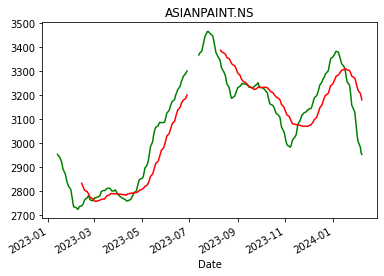

 ticker = DABUR.NS 0.9856419439217067


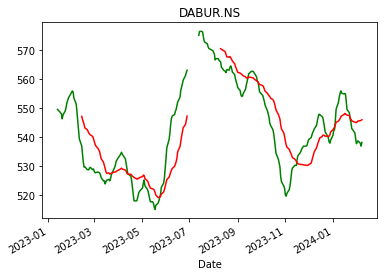

 ticker = HDFCBANK.NS 0.923528666278275


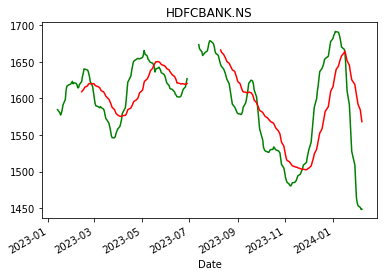

 ticker = HINDUNILVR.NS 0.96494650742461


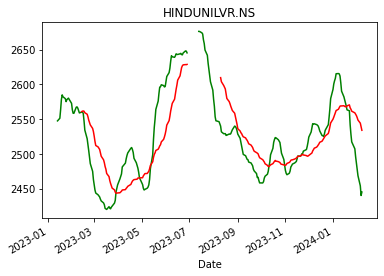

 ticker = INDUSINDBK.NS 0.9614932474048221


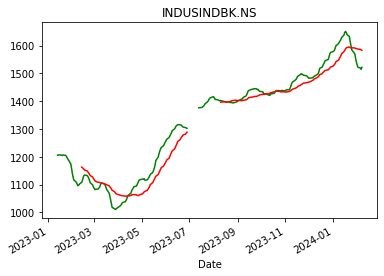

 ticker = ITC.NS 0.9651285910019717


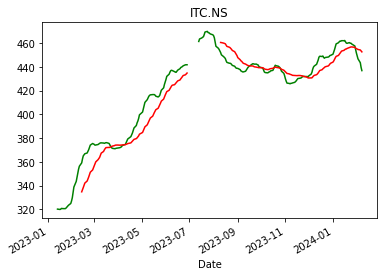

 ticker = JUBLFOOD.NS 0.9495077959981363


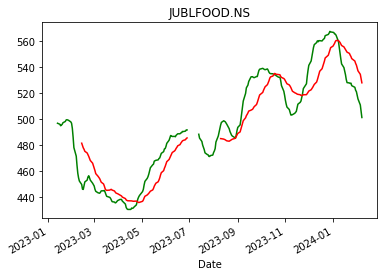

 ticker = KOTAKBANK.NS 0.9880124986285781


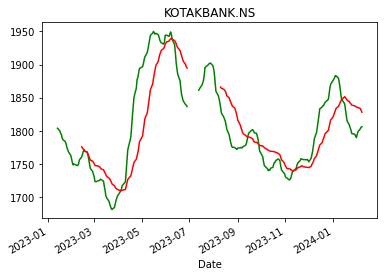

 ticker = LT.NS 0.9915020442938132


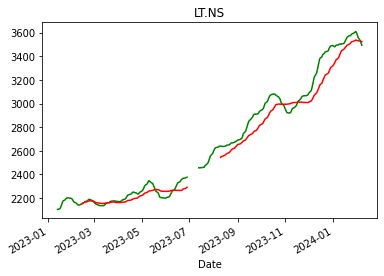

 ticker = PIIND.NS 0.9754603422317548


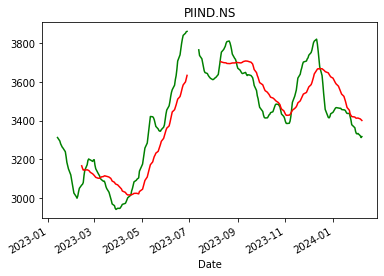

 ticker = TITAN.NS 0.990185369311004


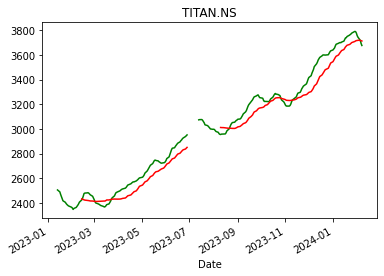

 ticker = AXISBANK.NS 0.9705655175946953


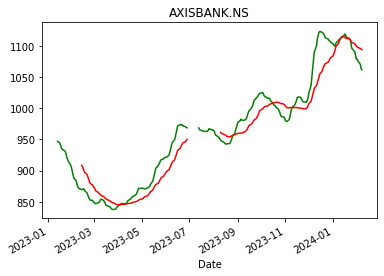

 ticker = BAJAJFINSV.NS 0.9859657115320372


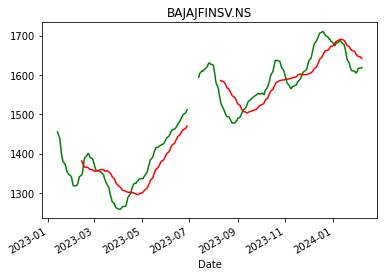

 ticker = BIOCON.NS 0.9985307435344596


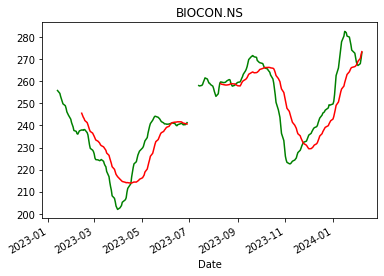

 ticker = HAVELLS.NS 0.9657100331018387


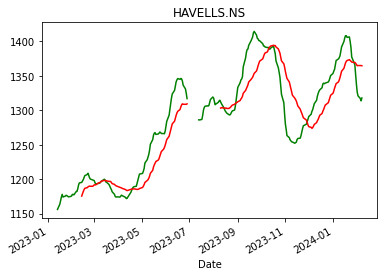

 ticker = KAJARIACER.NS 0.9909510095635402


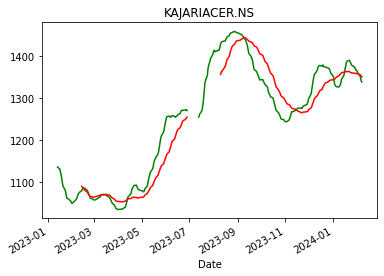

 ticker = LALPATHLAB.NS 0.9859175259681955


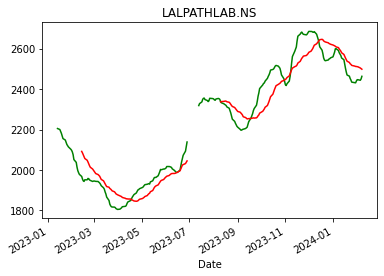

 ticker = PCJEWELLER.NS 0.9821987041899176


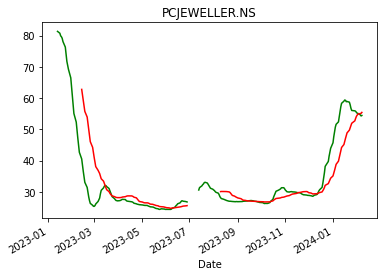

 ticker = SBILIFE.NS 0.9974068724403695


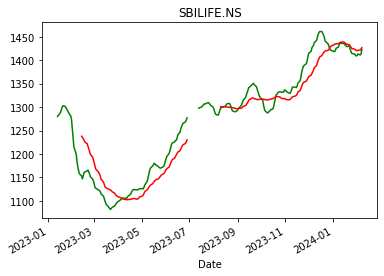

In [13]:




for ticker in final_list:
    if(close_price_df.loc[close_price_df.index.max()][ticker+'.ma_ratio'] < 1):
        print(f" ticker = {ticker} {close_price_df.loc[close_price_df.index.max()][ticker+'.ma_ratio']}")
        close_price_df[ticker+".MA10"].plot(label=ticker+'.MA10',title=ticker,color='green', y='MA10' )
        close_price_df[ticker+".MA50"].plot(label=ticker+'.MA50',title=ticker, color='red', y='MA50')
        plt.show()